### Character Recognition of the Wood Counter
Pytesseract classification of the wood counter is extremely bad. However it just takes a small erosion to make the OCR much reliable.

In [243]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
%matplotlib inline

plt.rcParams["figure.figsize"] =(15,15)

In [217]:
img = cv2.imread('./screenshots/Screen Shot 2018-06-09 at 1.16.44 PM.png')
# wood counter location
x, y, w, h = [70, 180, 150, 208]

In [218]:
# change cv2 BGR into RGB so that matplot lib can render properly
B, G, R = cv2.split(img)
img = cv2.merge([R, G, B])

#### This is where the wood counter is

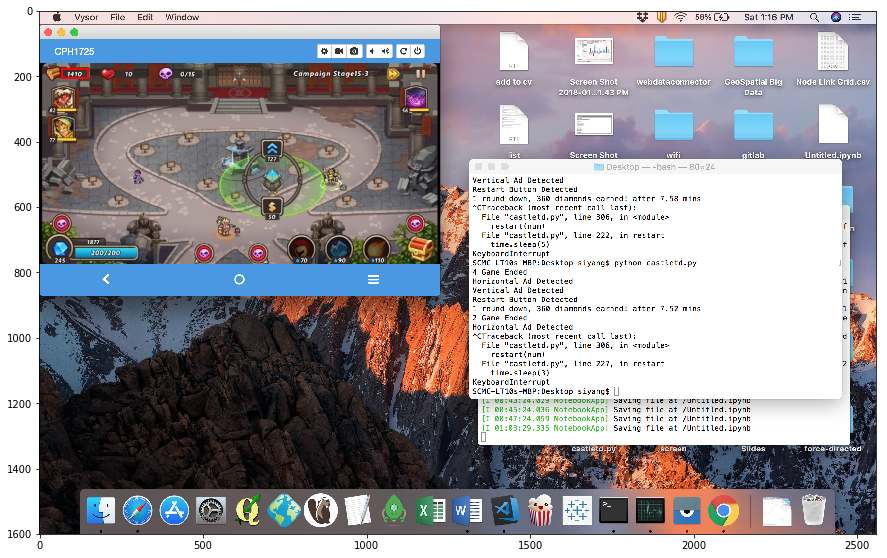

In [219]:
rect = cv2.rectangle(img, (x,y), (w,h), (255,0,0), 5)
plt.imshow(rect);

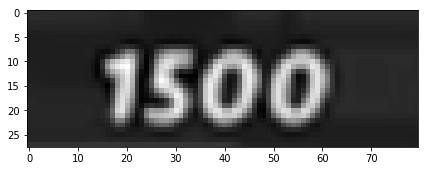

In [326]:
plt.figure(figsize=(7,7))
img2 = cv2.imread('./screenshots/wood_counter/screen.png',0)
wood = img2[180:208, 70:150]
plt.imshow(wood, 'gray');

#### Let's crop out the wood counter

In [331]:
# collect all screenshots into a list
path = './screenshots/wood_counter'
screens = []
for root, dirs, files in os.walk(path):
    for i in files:
        if i.endswith('.png'):
            screens.append(os.path.join(root,i)) # get full path of files 
screens

['./screenshots/wood_counter/screen6.png',
 './screenshots/wood_counter/screen4.png',
 './screenshots/wood_counter/screen5.png',
 './screenshots/wood_counter/screen1.png',
 './screenshots/wood_counter/screen2.png',
 './screenshots/wood_counter/screen3.png',
 './screenshots/wood_counter/screen.png']

In [332]:
# store numpy arrays of each screenshot
screens2 = []
for i in screens:
    # read all images
    read = cv2.imread(i)
    # crop to wood counters only
    crop = read[180:208, 70:150]
    screens2.append(crop)

#### Now Try Eroding Each Wood Counter Image

In [334]:
# erode each wood counter
eroded = []
for wood in screens2:
    # perform an erosion with 2/2 kernel
    kernel = np.ones((2,2), np.uint8)
    erode = cv2.erode(wood, kernel, iterations = 1)
    eroded.append(erode)

# store both original & eroded images in single list for plotting
plotting = []
for i in range(7):
    plotting.append(screens2[i])
    plotting.append(eroded[i])

#### We compare between the original cropped image (left) & one with a small erosion (right)

We can see that the original classify poorly, while the eroded one is almost perfect (except 1). Pytesseract is trained to recognise numbers, alphabets & symbols; which resulted in it being more general in classification.

I guess it would be better to have a trained model using only digits. But this will do for now.

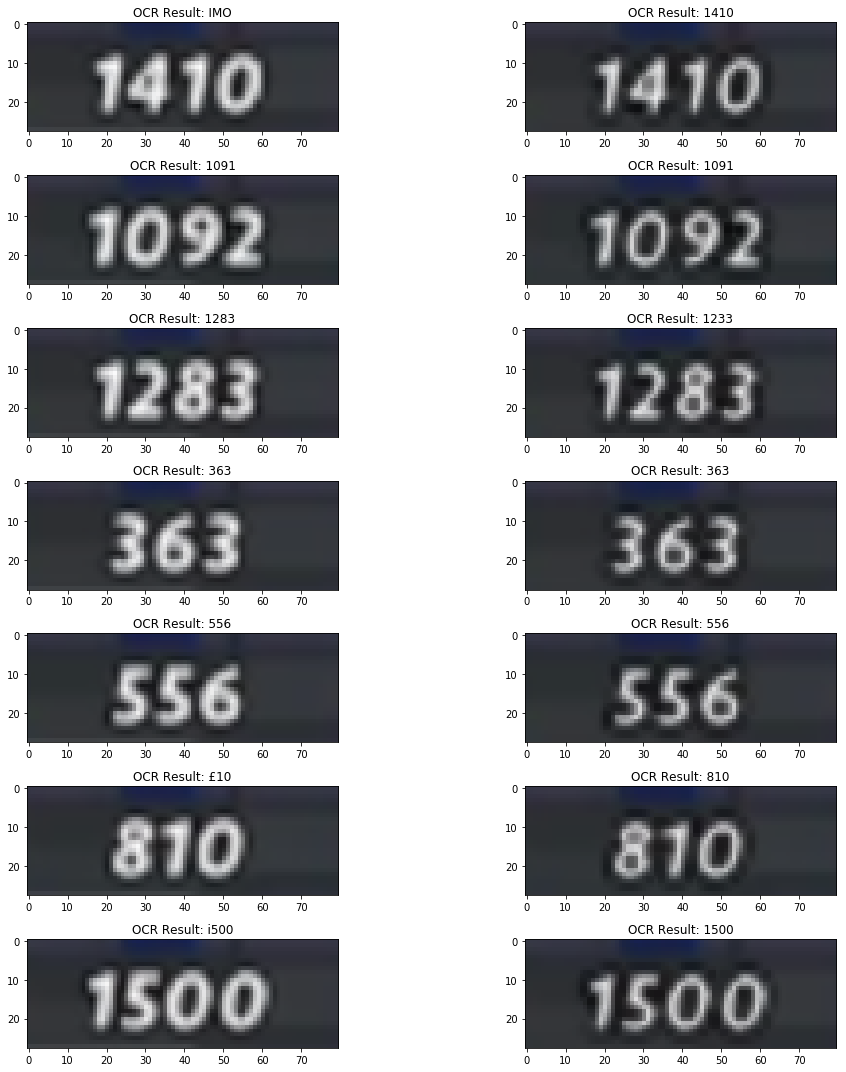

In [335]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(15, 15))
a = [i for i in axes for i in i]

# compare results of OCR
for i, ax in enumerate(a):
    ax.imshow(plotting[i], 'gray');
    # OCR, replace any spaces if any
    ocr = pytesseract.image_to_string(plotting[i]).replace(' ','')
    ax.set_title('OCR Result: ' + ocr)

plt.tight_layout()